**Africa data**

In [1]:
# Import the relevant modules (libraries/packages)

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
import requests
from bs4 import BeautifulSoup
import random
from wordcloud import WordCloud
import os
import spacy

import warnings

warnings.filterwarnings("ignore")



/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Installing the package pattern

!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 90.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332718 sha256=86a5038ce945ef114db05cfea997978abd2f8e0a6d40ca03381498efaff22cdc
  Stored in directory

In [3]:
# Spacy makes it easy to build systems for information extraction.

import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob

from pattern.en import sentiment

**Loading Data from relevant sources**

In [4]:
# Use request package to make a GET request for the website.

req =requests.get('https://www.universityworldnews.com/post.php?story=20230207160059558')


In [5]:
# using the correct encoding of html page

req.encoding = 'utf-8'

In [6]:
# Extract the html
html = req.text

In [7]:
# Printing the first 100 characters in html
print(html[:5000])

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="content-type" content="text/html;charset=UTF-8">
<meta http-equiv="pragma" content="no-cache">
<meta name="robots" content="noarchive, noimageindex">
<link rel="canonical" href="https://www.universityworldnews.com/post.php?story=20230207160059558" />
<title>Embrace it or reject it? Academics disagree about ChatGPT</title>
<meta property="twitter:site" content="@uniworldnews" />
<meta property="twitter:card" content="summary_large_image" />
<meta property="og:site_name" content="University World News">
<meta property="og:title" content="Embrace it or reject it? Academics disagree about ChatGPT">
<meta property="og:type" content="article">
<meta name="keywords" content="university, news, academic, higher education, education, transformative, leadership, academic freedom">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<link rel="search" href="https://www.universityworldnews.com/fullsearch.php" title="Advanced Search">
<lin

In [8]:
# Create a BeautifulSoup object
soup = BeautifulSoup(html)

In [9]:
# Get the text out of the soup
text = soup.get_text()

In [10]:
len(text)

14216

In [11]:
# See some text

print(text[:2000])







Embrace it or reject it? Academics disagree about ChatGPT




 











   











Global Edition

Home
News
Coronavirus Crisis
World round-up
Commentary
World Blog
Features
Transformative Leadership
Academic Freedom
Special Reports
Student View
Letters
Subscribe Newsletter



Africa Edition

Home
Africa News
Coronavirus Africa
Africa Commentary
Africa Features
Africa Student View
Subscribe Newsletter
Special Reports


Asia Hub
SDGs Hub
Transformative Leadership

Special Reports

Global Special Reports
Africa Special Reports
Coronavirus Crisis
Coronavirus Africa



Partnerships

Creative Services
Advertising



Search

Advanced Search
Articles by Country
Global Newsletter Archives
Africa Newsletter Archives



About Us

About UWN
Subscribe Newsletter
Advertising
Sponsorship
Terms & Conditions
Contact Us






Image: iStockJoin us on FacebookFollow us on TwitterFeatured EmployersLatest Vacancies in HEITALYPrincipalEuropean University Institute


NORTH AFRICA  Embrace it or 

In [12]:
# Show the entire text

text

"\n\n\n\n\n\nEmbrace it or reject it? Academics disagree about ChatGPT\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n   \n\n\n\n\n\n\n\n\n\n\n\nGlobal Edition\n\nHome\nNews\nCoronavirus Crisis\nWorld round-up\nCommentary\nWorld Blog\nFeatures\nTransformative Leadership\nAcademic Freedom\nSpecial Reports\nStudent View\nLetters\nSubscribe Newsletter\n\n\n\nAfrica Edition\n\nHome\nAfrica News\nCoronavirus Africa\nAfrica Commentary\nAfrica Features\nAfrica Student View\nSubscribe Newsletter\nSpecial Reports\n\n\nAsia Hub\nSDGs Hub\nTransformative Leadership\n\nSpecial Reports\n\nGlobal Special Reports\nAfrica Special Reports\nCoronavirus Crisis\nCoronavirus Africa\n\n\n\nPartnerships\n\nCreative Services\nAdvertising\n\n\n\nSearch\n\nAdvanced Search\nArticles by Country\nGlobal Newsletter Archives\nAfrica Newsletter Archives\n\n\n\nAbout Us\n\nAbout UWN\nSubscribe Newsletter\nAdvertising\nSponsorship\nTerms & Conditions\nContact Us\n\n\n\n\n\n\nImage: iStockJoin us on FacebookFollow us on TwitterFeatu

In [13]:
clean_text= text.replace("\n", " ")

In [14]:
clean_text= clean_text.replace("/", " ")       

In [15]:
clean_text= ''.join([c for c in clean_text if c != "\'"])

In [16]:
clean_text

'      Embrace it or reject it? Academics disagree about ChatGPT                                 Global Edition  Home News Coronavirus Crisis World round-up Commentary World Blog Features Transformative Leadership Academic Freedom Special Reports Student View Letters Subscribe Newsletter    Africa Edition  Home Africa News Coronavirus Africa Africa Commentary Africa Features Africa Student View Subscribe Newsletter Special Reports   Asia Hub SDGs Hub Transformative Leadership  Special Reports  Global Special Reports Africa Special Reports Coronavirus Crisis Coronavirus Africa    Partnerships  Creative Services Advertising    Search  Advanced Search Articles by Country Global Newsletter Archives Africa Newsletter Archives    About Us  About UWN Subscribe Newsletter Advertising Sponsorship Terms & Conditions Contact Us       Image: iStockJoin us on FacebookFollow us on TwitterFeatured EmployersLatest Vacancies in HEITALYPrincipalEuropean University Institute   NORTH AFRICA  Embrace it or

In [17]:
# Get the sentences

sentence=[]


tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [18]:
sentence

['Embrace it or reject it?',
 'Academics disagree about ChatGPT                                 Global Edition  Home News Coronavirus Crisis World round-up Commentary World Blog Features Transformative Leadership Academic Freedom Special Reports Student View Letters Subscribe Newsletter    Africa Edition  Home Africa News Coronavirus Africa Africa Commentary Africa Features Africa Student View Subscribe Newsletter Special Reports   Asia Hub SDGs Hub Transformative Leadership  Special Reports  Global Special Reports Africa Special Reports Coronavirus Crisis Coronavirus Africa    Partnerships  Creative Services Advertising    Search  Advanced Search Articles by Country Global Newsletter Archives Africa Newsletter Archives    About Us  About UWN Subscribe Newsletter Advertising Sponsorship Terms & Conditions Contact Us       Image: iStockJoin us on FacebookFollow us on TwitterFeatured EmployersLatest Vacancies in HEITALYPrincipalEuropean University Institute   NORTH AFRICA  Embrace it or 

**There are 73 sentences**

In [19]:
print(len(sentence))

73


In [20]:
# Using TextBlob
textblob_sentiment=[]

for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    
    textblob_sentiment.append([s,a,b])


In [21]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity']) 

In [22]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      73 non-null     object 
 1   Polarity      73 non-null     float64
 2   Subjectivity  73 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


**Polarity is between -1 (extreme negative), 0 (neutral) and 1 (extreme positive**

**Subjectivity is from 0 to 1, where 1 is extremely subjective**

In [23]:
df_textblob.head(20)

,Sentence,Polarity,Subjectivity
0,Embrace it or reject it?,0.000000,0.000000
1,Academics disagree about ChatGPT ...,0.244156,0.405195
2,Academics disagree about ChatGPT Wagdy Sawahel...,0.005000,0.555000
3,Whereas some academics embrace and support the...,0.000000,0.500000
4,"In fact, some proponents view opposition to Ch...",0.200000,0.600000
5,They argue that this is possible by putting in...,0.000000,0.500000
6,"ChatGPT – in full, the Chat Generative Pre-Tra...",-0.125000,0.775000
7,"AI natural language processing, or NLP, system...",0.057143,0.421429
8,"Engineer Waleed Gashout, president of the Priv...",0.105000,0.330000
9,"ChatGPT is unavailable in 45 countries, includ...",0.000000,0.000000


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

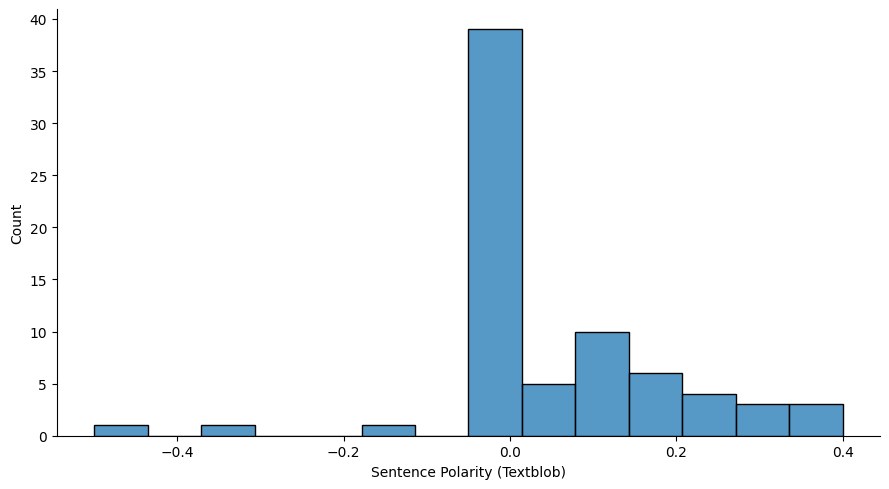

In [24]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

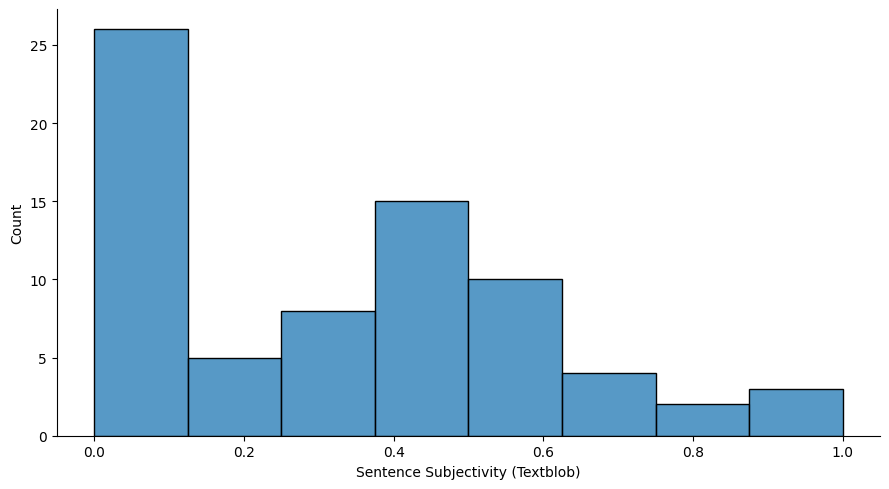

In [25]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [26]:
# Word cloud

clean_text[100:800]

'al Edition  Home News Coronavirus Crisis World round-up Commentary World Blog Features Transformative Leadership Academic Freedom Special Reports Student View Letters Subscribe Newsletter    Africa Edition  Home Africa News Coronavirus Africa Africa Commentary Africa Features Africa Student View Subscribe Newsletter Special Reports   Asia Hub SDGs Hub Transformative Leadership  Special Reports  Global Special Reports Africa Special Reports Coronavirus Crisis Coronavirus Africa    Partnerships  Creative Services Advertising    Search  Advanced Search Articles by Country Global Newsletter Archives Africa Newsletter Archives    About Us  About UWN Subscribe Newsletter Advertising Sponsorship Te'

In [27]:
clean_text

'      Embrace it or reject it? Academics disagree about ChatGPT                                 Global Edition  Home News Coronavirus Crisis World round-up Commentary World Blog Features Transformative Leadership Academic Freedom Special Reports Student View Letters Subscribe Newsletter    Africa Edition  Home Africa News Coronavirus Africa Africa Commentary Africa Features Africa Student View Subscribe Newsletter Special Reports   Asia Hub SDGs Hub Transformative Leadership  Special Reports  Global Special Reports Africa Special Reports Coronavirus Crisis Coronavirus Africa    Partnerships  Creative Services Advertising    Search  Advanced Search Articles by Country Global Newsletter Archives Africa Newsletter Archives    About Us  About UWN Subscribe Newsletter Advertising Sponsorship Terms & Conditions Contact Us       Image: iStockJoin us on FacebookFollow us on TwitterFeatured EmployersLatest Vacancies in HEITALYPrincipalEuropean University Institute   NORTH AFRICA  Embrace it or

In [28]:
# Create tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+, 0-9, d+')

In [29]:
# Converting the sentence into words WORD TOKENIZE

from nltk.tokenize import word_tokenize

In [30]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
chatGPT_words = word_tokenize(clean_text)

In [32]:
chatGPT_words = [word for word in chatGPT_words if word.isalnum()]

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords

In [35]:
stopwords = set(stopwords.words('english'))

In [36]:
chatGPT_words = [word for word in chatGPT_words if not str.lower(word) in stopwords]

In [37]:
# Check the frequency and probabilities
from nltk.probability import FreqDist

In [38]:
word_frequency = FreqDist(chatGPT_words)

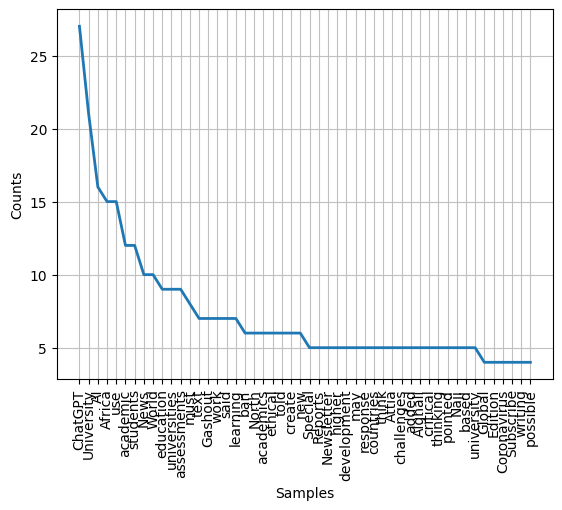

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
# A plot of word frequency
word_frequency.plot(50, cumulative=False)

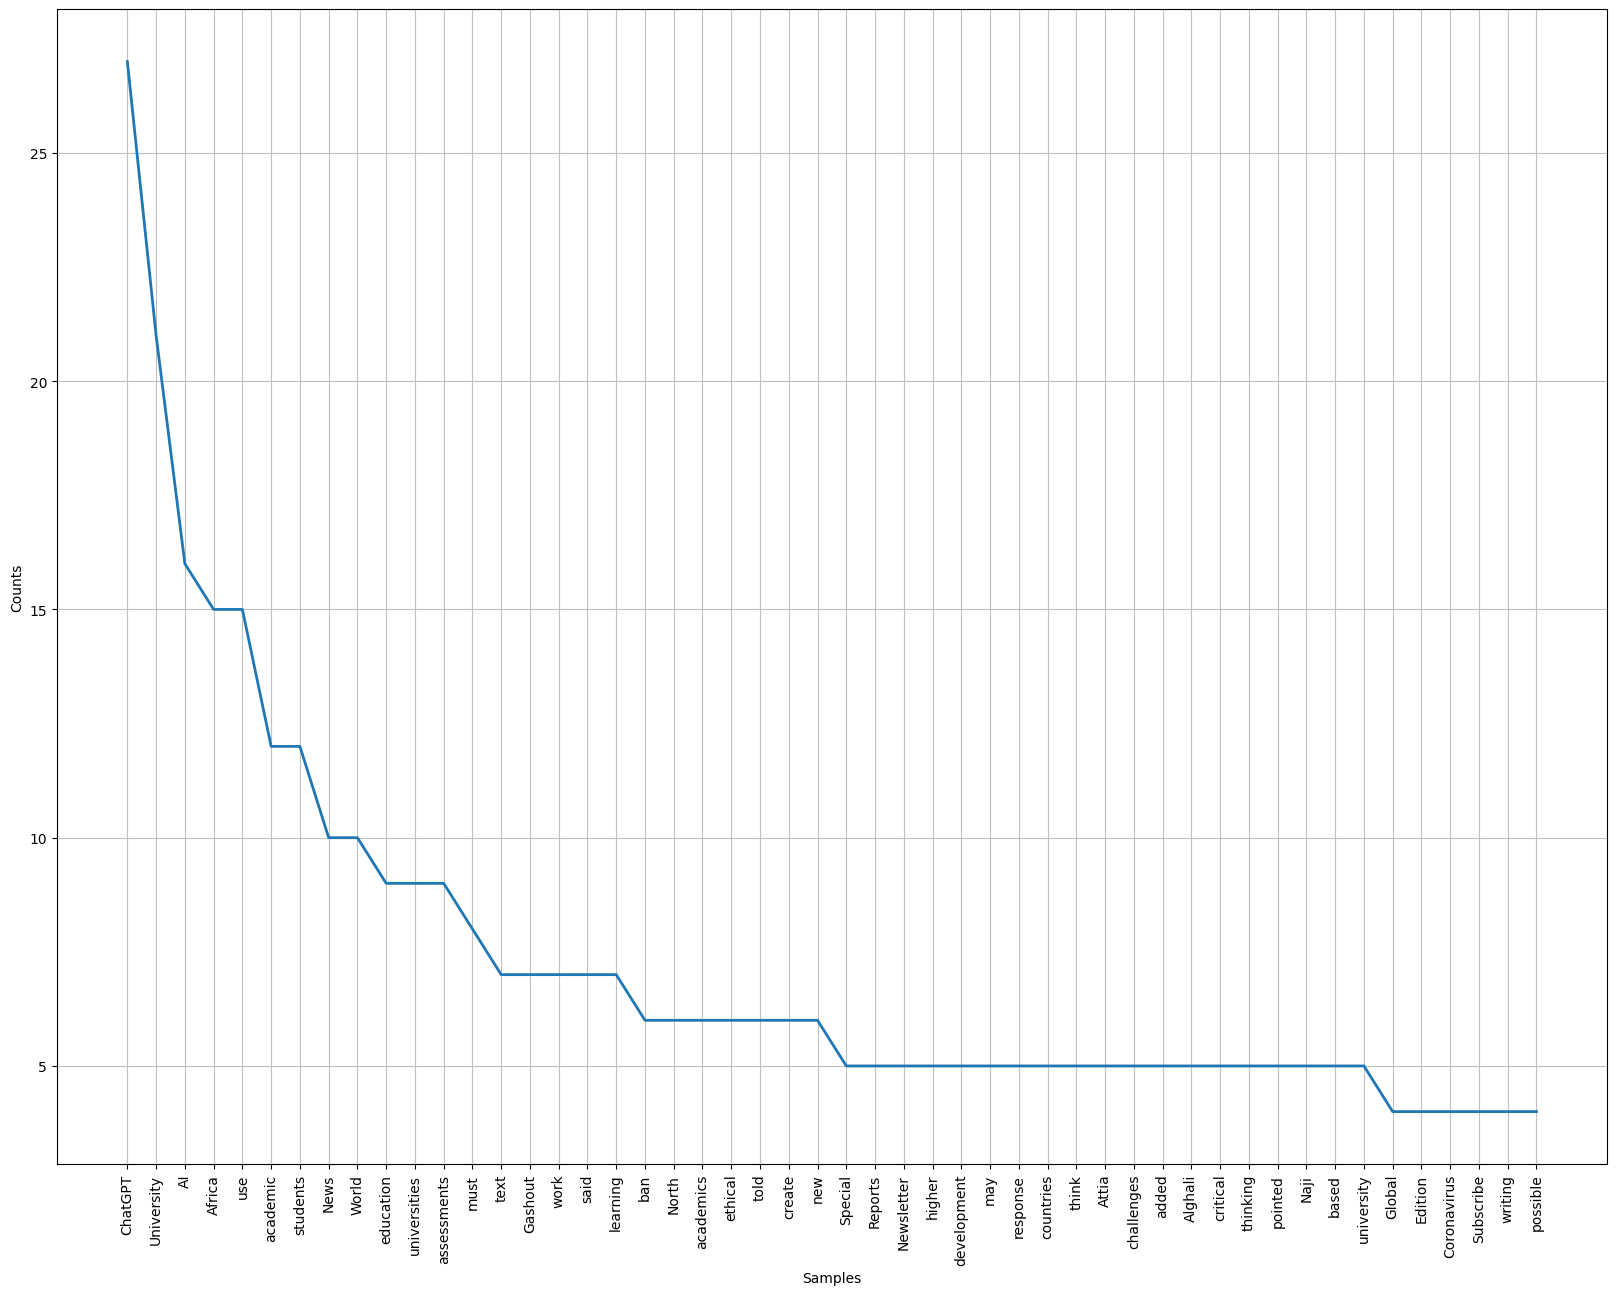

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
# Make the above larger
plt.figure(figsize=(20,15))
word_frequency.plot(50, cumulative=False)

In [41]:
# Remove words that are not needed for our analysis.
# We have 50 words at the moment, remove new stopwords

chatGPT_words = [w for w in chatGPT_words if not w in ['Coronavirus', 'university', 'added', 'told', 'said', 'must', 'higher', 'may', ]]


In [42]:
chatGPT_words

['Forbes',
 'AfricaAdvertiseSubscribeClose',
 'search',
 'Close',
 'MenuUnder',
 '30BillionairesCover',
 'StoryEntrepreneursWomanTechnologyListsAfrica',
 'UndiscoveredDownload',
 'seconds',
 'agoAfrica',
 'Top',
 'Employers',
 '202310',
 'hours',
 'agoRwanda',
 'Mining',
 'Sector',
 'Poised',
 'Even',
 'Growth',
 'Commodity',
 'Prices',
 'Continue',
 'Rise10',
 'hours',
 'Shift',
 'Shock',
 'Pushes',
 'Workers',
 'Back',
 'Old',
 'Jobs1',
 'day',
 'agoAfrican',
 'Sounds',
 'Reign',
 'Angélique',
 'Kidjo',
 'Takes',
 'Home',
 '2023',
 'Polar',
 'Music',
 'Prize1',
 'day',
 'agoStudy',
 'Finds',
 'Direct',
 'Links',
 'High',
 'Blood',
 'Pressure',
 'Dementia2',
 'days',
 'Battles',
 'African',
 'Sports',
 'Stars',
 'Handle',
 'Mental',
 'Health',
 'Issues2',
 'days',
 'agoHow',
 'ChatGPT',
 'Fast',
 'Becoming',
 'Teacher',
 'Pet4',
 'days',
 'agoCars',
 'Feelings',
 'Forbes',
 'Africa',
 'Driving',
 'Seat4',
 'days',
 'agoCovid',
 'Rates',
 'Hit',
 'States',
 'Differently',
 'Based',
 'P

In [42]:
from wordcloud import WordCloud

In [43]:
chatGPT_words_new = (" ").join(chatGPT_words)

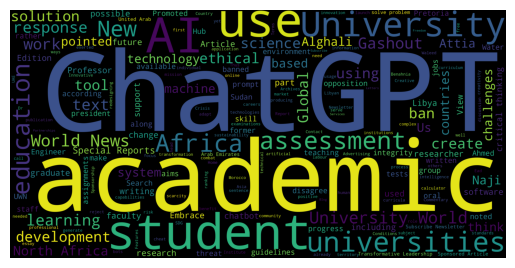

In [44]:
wordcloud = WordCloud(width=4000, height=2000).generate(chatGPT_words_new)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()